# Lecture 3, Nonlinear dynamics, stability and bifurcations

> ordinary differential equations (ODE)

Thanks a lot to [David P. Sanders](https://github.com/dpsanders) for providing the lecture. The original lecture is part of the MIT class [Introduction to Computational Thinking](https://computationalthinking.mit.edu/Fall20/lecture20/).

This class uses the [Julia programming language](http://www.julialang.org/). The orignal code can be found under [github.com](https://github.com/mitmath/18S191/blob/master/lecture_notebooks/week11/nonlinear_dynamics_bifurcations.jl)

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import HTML
from IPython.display import display

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
%matplotlib inline

How does the climate change over time? In the last lecture we saw that our simple model is already quite good simulating how the climate changes over time.

Our simple model is based on *ordinary differential equations (ODEs)*, where some variables change in time - with the rate of change as function of their current values.

$$ \frac{dx(t)}{dt} = f(x(t)) $$

The simplest numerical method to solve such an equation is the **(forward) Euler method**, in which we convert this equation into an explicit time-stepping routine:

$$ \frac{dx(t)}{dt} = \frac{x(t+\Delta t) - x(t)}{\Delta t}$$


with the approximation

$$ x(t+\Delta t) \simeq x(t) + \Delta t f(x(t)) $$

## Solving the ODE: Euler method

Let's use this to simulate a simple nonlinear ODE that describes the dynamics of a population of bacteria. The bacteria will grow by reproduction at a rate $\lambda$ provided there is sufficient food, in which case we would have $\dot{x} = \lambda x$. But the available food will actually always limit the sustainable population to a value $K$. A simple model for this is as follows:

$$\dot{x} = \lambda \, x \, (K - x).$$

When $x$ is close to $0$, the growth rate is $\lambda$, but that rate decreases as $x$ increases.

This is sometimes called the [**logistic** differential equation](https://en.wikipedia.org/wiki/Logistic_function#Logistic_differential_equation) (although the name does not seem particularly helpful).


Our goal is to use computational thinking, but we will actually not be interested so much in the exact dynamics in time, but rather in the **qualitative** features of the behaviour of the system. For example, at long times (formally $t \to \infty$) does the population get arbitrarily large? Or does it, for example, oscillate around a particular value? Or does it converge to a particular size? This forms the subject of **nonlinear dynamics** or **dynamical systems** theory. 


Let's simulate the system using the Euler method to try to guess the answer to this question. We should never use the Euler method in practice, but should use a tried and tested library instead, and algorithms that provide much better accuracy in the solutions, if we are interested in faithful numerical results.

We'll rescale the variables to the simplest form:

$$ \frac{dx}{dt} = x\,(1-x) $$


$$ x_{n+1} = x_n + \Delta t \cdot \text{tendency}(x_n; ...)$$

In [18]:
def logistic(x, timesteps):
    x = np.asarray(x)
    for i in np.diff(timesteps):
        if x.size == 1:
            x = np.append(x, x + i * x * (1-x))
        else:
            x = np.append(x, x[-1] + i * x[-1] * (1-x[-1]))
    return x

In [19]:
t1 = np.arange(0,20, 0.01)
dxdt = logistic(0.5, t1)

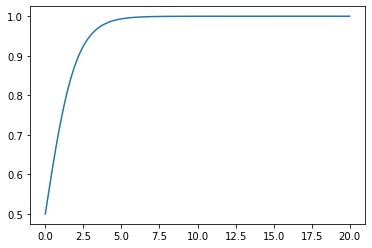

In [20]:
plt.plot(t1, dxdt)

We see that for this particular initial condition, the solution seems to settle down to a fixed value after some time, and then remains at that value thereafter.
Such a value is called a **fixed point** or a **stationary point** of the ODE.

## Qualitative behaviour: Fixed points and their stability

But what happens if we have a different initial condition:

In [21]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

def plot_func(initial_condition):
    plt.figure(figsize=(8,8))
    plt.plot(t1, logistic(initial_condition, t1))
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.xlim([0,10])
    plt.ylim(-1, 2)
    plt.grid()
    plt.show()
    
interact(plot_func, initial_condition = widgets.FloatSlider(value = 0.5,
                                                            min = -1,
                                                            max = 2,
                                                            step = 0.1))

interactive(children=(FloatSlider(value=0.5, description='initial_condition', max=2.0, min=-1.0), Output()), _…

<function __main__.plot_func(initial_condition)>

To get an overview, we can draw all graphs in a single plot.

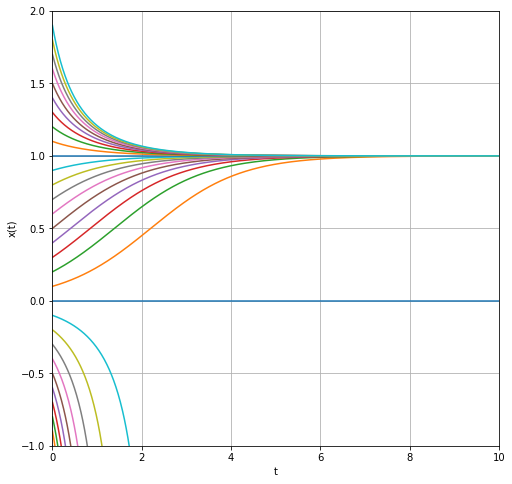

In [8]:
plt.figure(figsize=(8,8))
for initial_condition in np.arange(-1, 2, 0.1):
    plt.plot(t1, logistic(initial_condition, t1))
plt.xlabel("t")
plt.ylabel("x(t)")
plt.xlim([0,10])
plt.ylim(-1, 2)
plt.grid()
plt.show()

We see that all the curves starting near to $x_0=1.0$ seem to converge to 1 at long times. If the system starts *exactly* at 0 then it stays there forever. However, if it starts close to 0, on either side, then it moves *away* from 0 (on that same side of 0) -- starting from a negative value $x$ becomes ever more negative. (Even though negative populations have no meaning in the original interpretation as the dynamics of a population, we can still ask study the dynamics of the equation with negative initial conditions, since it may model other systems too.)

The special values $x^*_1=1$ and $x^*_2=0$ are called **stationary points** or **fixed points** of the differential equation. If we start at $x^*_i$, then the derivative there is $f'(x^*_i) = 0$, and hence we cannot move away from $x^*_i$! The fixed points can be found as zeros or **roots** of the function $f$, i.e. values $x^*$ such that $f(x^*) = 0$.

We see, though, that the two types of fixed points are **qualitatively different**: trajectories that start close to $x^*_1 = 1$ move *towards* $x^*_1$, whereas trajectories that start close to $x^*_2 = 0$ move *away* from it. We say that $x^*_1$ is a **stable fixed point** and $x^*_2$ is an **unstable fixed point**.

In general it is not possible to find analytical formulas for the position and stability of fixed points; instead, we can use numerical **root-finding algorithms**, for example the Newton method.


## State space: Vector field and phase portrait


If we want to find the whole trajectory for a given initial condition then we need to solve the equations, either numerically or analytically.

However, we may want less information about the system, for example the **long-time** or **asymptotic** dynamics. It turns out that we can obtain some information about that *without* explicitly solving the ODE! This is the **qualitative approach** to studying nonlinear systems.

Instead of drawing trajectories $x(t)$ as a function of time $t$, as we did above, let's use a different graphical representation, where we draw **state space** or **phase space**: This is the set ("space") of all possible values of the dependent variables ("states"). For the above ODE there is only a single dependent variable, $x$, so the state space is the real line, $\mathbb{R}$.

At each possible value of $x$, the ODE gives us information about the rate of change of $x(t)$ at that point. Let's draw an **arrow** at that point, pointing in the direction that a particle placed at that point would move: to the right if $\dot{x} > 0$ and to the left if $\dot{x} < 0$.

Text(0.5, 0, '[]')

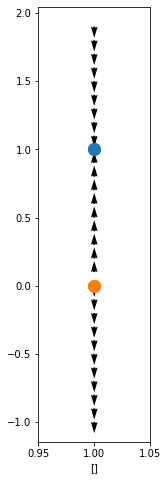

In [22]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)


states = np.array([])
initial_conditions = np.arange(-1, 2, 0.1)

for initial_condition in initial_conditions:
    states = np.append(states, logistic(initial_condition, t1)[-1])


X = np.ones(len(states))
Y = initial_conditions.copy()
U = np.zeros(len(states))
V = np.ones(len(states))
V[states - initial_conditions < 0] = -1


states[states == -np.inf] = 2
plt.figure(figsize=(2,8))
plt.quiver(X, Y, U, V, scale = 10, width = 0.02)
plt.plot([1,1],[1,1], marker = 'o', markersize = 12)
plt.plot([1,1],[0,0], marker = 'o', markersize = 12)
plt.xlim([1,1])
plt.xlabel([])

This vector field indeed gives us a *qualitative* picture of the dynamics. It does not tell us how fast the dynamics will occur in each region, but it indicates what the *tendency* is. We have coded the fixed points according to their stability; this may be calculated using the derivative evaluated at the fixed point, $f'(x^*)$, since this derivative controls the behaviour of nearby initial conditions $x^* + \delta x$.

## Bifurcations

Now suppose that there is a **parameter** $\mu$ in the system that can be varied. For each value of $\mu$ we have a *different* ODE

$$\dot{x} = f_\mu(x).$$
For example, 
$$\dot{x} = \mu + x^2.$$
Let's draw the state space for each different value of $\mu$:

In [24]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

def xdot(mu, x):
    return mu + x**2

t = np.arange(-5, 5, 0.001)

def plot_func(initial_condition):
    plt.figure(figsize=(8,8))
    a = xdot(mu = initial_condition, x = t)
    plt.plot(t, a)

    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.xlim([-5,5])
    plt.ylim(-2, 2)
    plt.grid()
    
    try:
        zero_crossings = np.where(np.diff(np.signbit(a)))[0]
        plt.vlines(t[zero_crossings+1], ymin=-2,ymax=2)
        for arrows in np.arange(-5,t[zero_crossings[0]],0.5):
            plt.arrow(arrows, 0, 0.25, 0,shape='full', lw=1, length_includes_head=True, head_width=.05, color ="blue")
        for arrows in np.arange(t[zero_crossings[0]]+0.5, t[zero_crossings[1]],0.5):
            plt.arrow(arrows, 0, -0.25, 0,shape='full', lw=1, length_includes_head=True, head_width=.05, color = "blue")
        for arrows in np.arange(t[zero_crossings[1]], 5,0.5):
            plt.arrow(arrows, 0, +0.25, 0,shape='full', lw=1, length_includes_head=True, head_width=.05, color ="red")
        plt.plot([t[zero_crossings],t[zero_crossings]],[0,0], marker='o', markersize = 12)
    except:
        for arrows in np.arange(-5,5,0.5):
            plt.arrow(arrows, 0, 0.25, 0,shape='full', 
                      lw=1, length_includes_head=True, head_width=.05, color ="blue") 
    plt.show()
    
interact(plot_func, initial_condition = widgets.FloatSlider(value = -1,
                                                            min = -2,
                                                            max = 2,
                                                            step = 0.1))

interactive(children=(FloatSlider(value=-1.0, description='initial_condition', max=2.0, min=-2.0), Output()), …

<function __main__.plot_func(initial_condition)>

Now let's collect all the vector fields into a single plot. We *rotate* the vector field to now be vertical, thinking of the dynamics of $x$ as occurring along the vertical direction. The horizontal axis now represents the different possible values of the parameter $\mu$:

Text(0.5, 0, '$\\mu$')

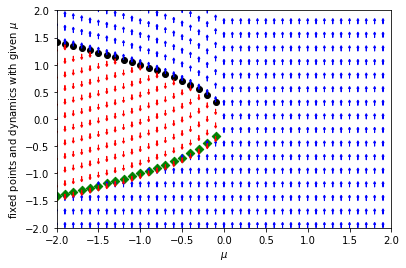

In [11]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

saddle_points0 = np.array([])
saddle_points1 = np.array([])

stepsize = 0.1
for mu in np.arange(-2, 2, stepsize):
    a = xdot(mu = mu, x = t)
    zero_crossings = np.where(np.diff(np.signbit(a)))[0]
    if zero_crossings.size > 1:
        saddle_points0 = np.append(saddle_points0, t[zero_crossings[0]])
        saddle_points1 = np.append(saddle_points1, t[zero_crossings[1]])
        for arrows in np.arange(-5,t[zero_crossings[0]],0.25):
            plt.arrow(mu, arrows, 0.0, 0.1,shape='full', lw=1, length_includes_head=True, head_width=.025, color ="blue")
        for arrows in np.arange(t[zero_crossings[0]], t[zero_crossings[1]],0.25):
            plt.arrow(mu, arrows, 0.0, -0.1,shape='full', lw=1, length_includes_head=True, head_width=.025, color ="red")
        for arrows in np.arange(t[zero_crossings[1]],2,0.25):
            plt.arrow(mu, arrows, 0.0, 0.1,shape='full', lw=1, length_includes_head=True, head_width=.025, color ="blue")


    elif zero_crossings.size == 1:
        saddle_points0 = np.append(saddle_points0, t[zero_crossings])
        saddle_points1 = np.append(saddle_points0, np.nan)
    else:
        saddle_points0 = np.append(saddle_points0, np.nan)
        saddle_points1 = np.append(saddle_points1, np.nan) 
        
        for arrows in np.arange(-2,2,0.25):
            plt.arrow(mu, arrows, 0.0, 0.1,shape='full', lw=1, length_includes_head=True, head_width=.025, color ="blue")
    
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.scatter(np.arange(-2,2,stepsize), saddle_points0, color="green", marker='D')
plt.scatter(np.arange(-2,2,stepsize), saddle_points1, color="black", marker='o')
plt.ylabel("fixed points and dynamics with given $\mu$")
plt.xlabel("$\mu$")

Now let's collect all the vector fields into a single plot. We *rotate* the vector field to now be vertical, thinking of the dynamics of $x$ as occurring along the vertical direction. The horizontal axis now represents the different possible values of the parameter $\mu$:

We see that at the **critical value** $\mu_c = 0$ there is a **qualitative change in behaviour** in the system: for $\mu_c < 0$ there are two fixed points, whereas for $\mu_c > 0$ there are no fixed points at all.  In this particular ODE the two fixed points collide in a **saddle--node** or **fold** bifurcation.


## Bistability and hysteresis

Now let's look at the dynamics of the following system:


$$\dot{x} = \mu + x - x^3.$$



In [25]:
def h(mu, x):
    return mu + x - x**3

(-2.0, 2.0)

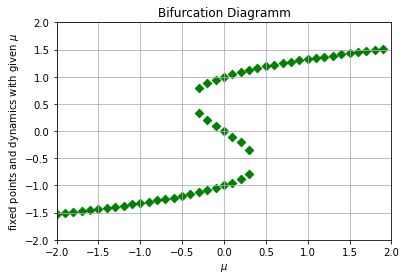

In [26]:
saddle_points = []

stepsize = 0.1
for mu in (np.arange(-2, 2, stepsize)):
    a = h(mu = mu, x = t)
    zero_crossings = np.where(np.diff(np.signbit(a)))[0]
    plt.scatter(np.ones(len(zero_crossings))*mu, t[zero_crossings], color="green", marker='D')

plt.grid()
plt.title("Bifurcation Diagramm")
plt.ylabel("fixed points and dynamics with given $\mu$")
plt.xlabel("$\mu$")
plt.ylim(-2,2)
plt.xlim(-2,2)

We see that there is a range of values of $\mu$ for which there are *three coexisting fixed points*, two stable and one unstable. Since there are two stable fixed points in which the system can remain, we say that the system is **bistable**.


Now that we understand what the plots mean and the dynamics, let's plot just the fixed points $x^*(\mu)$ as a function of $\mu$. Such a plot is called a **bifurcation diagram**:

The pieces of curve are called **branches**.



## Hysteresis



Suppose we now think about slowly varying the parameter $\mu$. If we change the parameter $\mu$ by a little, the system is no longer at a fixed point, since the position of the fixed point moves when $\mu$ changes. However, the system will then **relax** by following the dynamics at the new value of $\mu$, and will rapidly converge to the new fixed point nearby.
For example, starting at $\mu=-2$, the system will stay on the lower black (stable) **branch** until $\mu=0.4$ or so. At that point, two fixed points collide and annihilate each other! After that there is no longer a fixed point nearby. However, there is another fixed point much further up that will now attract all trajectories, so the system rapidly transitions to that fixed point.
Now suppose we decrease the parameter again. The system will now track the *upper* branch until $\mu=-0.4$ or so, when again it will jump back down.
For each parameter value $\mu$ in the interval $[-0.4, 0.4]$ there is **bistability**, i.e. **coexistence** of *two* fixed points with the same value of $\mu$ (together with a third, unstable fixed point that is not observable).
The fact that the system tracks different stable branches depending on where we started, i.e. on the history, is known as **hysteresis**.


Hysteretic behaviour like this is found in many scientific and engineering contexts, including switches in biology, for example genetic switches, and in the historical dynamics of the earth's climate.



## Slow--fast systems

What are we actually doing when we let the parameter $\mu$ vary? Effectively we now have a system with *two* equations, for example

$$\dot{x} = \mu + x - x^3;$$
$$\dot{\mu} = \epsilon,$$

where $\mu$ varies at some slow speed $\epsilon$. On a time scale much shorter than $1 / \epsilon$, the dynamics of $x$ "does not know" that $\mu$ is changing, so it will converge to a fixed point $x^*(\mu)$ for the current value of $\mu$. [An associated term is **adiabatic approximation**.] However, $\mu$ does gradually change, so the value of $x$ will effectively "slide along" the curve $x(t) \simeq x^*(\mu(t))$, tracking the curve of fixed points as $\mu$ changes.
Once $\mu$ reaches a critical value $\mu_c$, however, there is no longer a nearby fixed point, and the dynamics will rapidly transition to the far away alternative fixed point.
If we now reverse the dynamics of $\mu$, we slide back along the upper branch.
"""